In [101]:
# Identify number of time the accidents have taken place in a particular location

table = pd.pivot_table(Accident_Parameters,values='ADDRESS', index=['LOCATION','LATITUDE','LONGITUDE'],aggfunc='count')
table

,,,ADDRESS
LOCATION,LATITUDE,LONGITUDE,
POINT (-87.524587386649 41.703272315652),41.703272,-87.524587,3
POINT (-87.52467394828 41.702590432695),41.702590,-87.524674,2
POINT (-87.524720546869 41.691692338868),41.691692,-87.524721,3
POINT (-87.524748072503 41.698952907913),41.698953,-87.524748,2
POINT (-87.524790927642 41.693759814219),41.693760,-87.524791,1
...,...,...,...
POINT (-87.928221166655 41.955546694005),41.955547,-87.928221,2
POINT (-87.933993928974 41.958986950953),41.958987,-87.933994,23
POINT (-87.93450971722 42.008050932504),42.008051,-87.934510,2


In [102]:
# Making sure there are no Null Values

Accident_Parameters.drop(Accident_Parameters[Accident_Parameters['LATITUDE']==0.0].index, inplace = True)

In [103]:
Accident_Prone = copy.deepcopy(Accident_Parameters)

In [104]:
# Run only first time 
Accident_Prone = Accident_Prone.drop(columns =['INJURIES_FATAL','INJURIES_TOTAL', 'DAMAGE', 'Risk_Parameter_A', 'Risk_Parameter_B',
       'Risk_Parameter_C'],axis=1)


In [105]:
# Removing duplicate address and taking the mean of risk score of the accidents in each occuracnce

Accident_Prone = Accident_Prone.sort_values(['RISK_SCORE']).drop_duplicates(subset=['LOCATION','ADDRESS']).reset_index().drop('index',axis=1)

In [106]:
Accident_Prone

,LATITUDE,LONGITUDE,LOCATION,ADDRESS,RISK_SCORE
0,41.973130,-87.787779,POINT (-87.787778728474 41.973129833957),5037 N NAGLE AVE,0
1,41.925156,-87.676294,POINT (-87.676293521004 41.925156440725),1910 W FULLERTON AVE,0
2,41.894822,-87.755747,POINT (-87.755746863342 41.894822309693),5203 W CHICAGO AVE,0
3,41.907435,-87.687291,POINT (-87.687291422479 41.907435384743),1424 N WESTERN AVE,0
4,41.818841,-87.724113,POINT (-87.72411292982 41.818840580411),4060 S PULASKI RD,0
...,...,...,...,...,...
72676,41.881802,-87.617034,POINT (-87.617034159184 41.881802293444),13 S LAKE SHORE DR NB,7
72677,41.803086,-87.743179,POINT (-87.743178861585 41.80308551281),4928 S CICERO AVE,8
72678,41.895408,-87.706405,POINT (-87.706404595702 41.895407901235),757 N KEDZIE AVE,8
72679,41.884476,-87.693273,POINT (-87.693272523474 41.884476074976),2650 W LAKE ST,8


In [107]:
Accident_Prone = Accident_Prone.sort_values(['RISK_SCORE']).drop_duplicates(subset=['LOCATION','ADDRESS']).reset_index().drop('index',axis=1)

In [108]:
Accident_Prone = Accident_Prone.groupby(['LATITUDE','LONGITUDE','LOCATION','ADDRESS']).RISK_SCORE.mean().reset_index().sort_values(['RISK_SCORE']).reset_index().drop('index',axis=1)
Accident_Prone

,LATITUDE,LONGITUDE,LOCATION,ADDRESS,RISK_SCORE
0,41.751937,-87.559164,POINT (-87.559164441365 41.751936931709),2658 E 79TH ST,0.0
1,41.866555,-87.685890,POINT (-87.685889678053 41.866555356935),1201 S WESTERN AVE,0.0
2,41.774742,-87.612947,POINT (-87.612947221978 41.774741663786),6601 S MARQUETTE RD,0.0
3,41.774738,-87.613240,POINT (-87.613240463362 41.774738328394),6600 S MARQUETTE RD,0.0
4,41.774708,-87.739798,POINT (-87.739797521765 41.774708227681),4701 W 65TH ST,0.0
...,...,...,...,...,...
72676,41.880890,-87.721388,POINT (-87.721388487921 41.880889879848),3814 W MADISON ST,7.0
72677,41.803086,-87.743179,POINT (-87.743178861585 41.80308551281),4928 S CICERO AVE,8.0
72678,41.895408,-87.706405,POINT (-87.706404595702 41.895407901235),757 N KEDZIE AVE,8.0
72679,41.884476,-87.693273,POINT (-87.693272523474 41.884476074976),2650 W LAKE ST,8.0


# C) Provide Safer Route Based on the accident and Road Traffic Violation

In [109]:
Risky_Areas = Accident_Prone[Accident_Prone['RISK_SCORE']>=5]
Cautious_Areas = Accident_Prone[(Accident_Prone['RISK_SCORE']<5)&(Accident_Prone['RISK_SCORE']>=3)]
Safe_Areas = Accident_Prone[Accident_Prone['RISK_SCORE']<3]

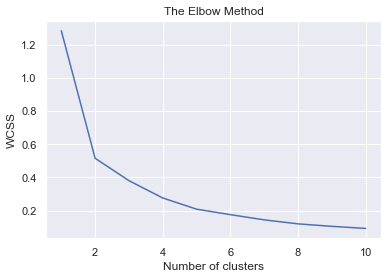

In [110]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from itertools import cycle
import matplotlib.pyplot as plt
import matplotlib.cm as cm


A = Risky_Areas.iloc[:, 0:2].values
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans_A = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_A.fit(A)
    wcss.append(kmeans_A.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

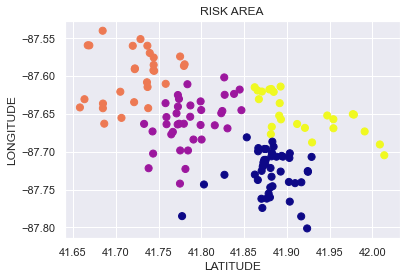

In [111]:
# Risk Area

kmeans_AA = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans_A = kmeans_AA.fit_predict(A)



Risky_Areas['CLUSTERS'] = y_kmeans_A +1


plt.scatter(A[:, 0], A[:, 1], c=y_kmeans_A, s=50, cmap='plasma')
centers_A = kmeans_AA.cluster_centers_

plt.title('RISK AREA')
plt.xlabel('LATITUDE')
plt.ylabel('LONGITUDE');

In [112]:
Risky_Areas

,LATITUDE,LONGITUDE,LOCATION,ADDRESS,RISK_SCORE,CLUSTERS
72547,41.871766,-87.719561,POINT (-87.71956135568 41.87176574478),727 S INDEPENDENCE BLVD,5.0,1
72548,41.866629,-87.695098,POINT (-87.695098090954 41.866629331397),2740 W ROOSEVELT RD,5.0,1
72549,41.872511,-87.717937,POINT (-87.717936582806 41.872511350085),3659 W FLOURNOY ST,5.0,1
72550,41.737164,-87.614399,POINT (-87.614398725718 41.737163690854),8639 S DR MARTIN LUTHER KING JR DR,5.0,3
72551,41.882330,-87.666983,POINT (-87.666982753227 41.882329582242),32 N ASHLAND AVE,6.0,4
...,...,...,...,...,...,...
72676,41.880890,-87.721388,POINT (-87.721388487921 41.880889879848),3814 W MADISON ST,7.0,1
72677,41.803086,-87.743179,POINT (-87.743178861585 41.80308551281),4928 S CICERO AVE,8.0,1
72678,41.895408,-87.706405,POINT (-87.706404595702 41.895407901235),757 N KEDZIE AVE,8.0,1
72679,41.884476,-87.693273,POINT (-87.693272523474 41.884476074976),2650 W LAKE ST,8.0,1


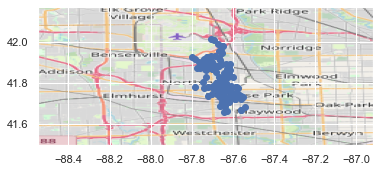

In [113]:

# The boundaries of the image map
map_box = [-88.5471, -86.9183, 41.4962, 42.1705]
# The name of the image of the New York map might be different.
map_img = plt.imread('C:/Users/mural/Desktop/Traffic dataset/Updated ones/chicago_map_3.png')
fig, ax = plt.subplots()
ax.scatter(Risky_Areas['LONGITUDE'],Risky_Areas['LATITUDE'])
ax.set_ylim(map_box[2], map_box[3])
ax.set_xlim(map_box[0], map_box[1])
ax.imshow(map_img, extent=map_box, alpha=1)

plt.savefig("Risk_Factor.png")
plt.show()

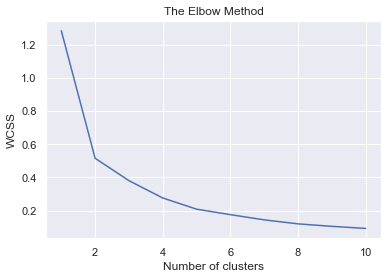

In [114]:
B = Cautious_Areas.iloc[:, 0:2].values
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans_B = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_B.fit(A)
    wcss.append(kmeans_B.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

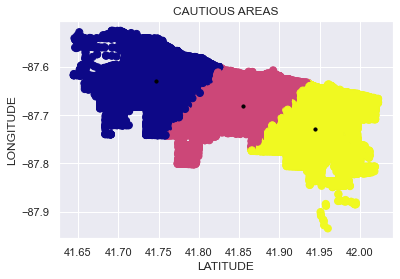

In [115]:
#Cautious Area

kmeans_BB = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_B = kmeans_BB.fit_predict(B)

plt.scatter(B[:, 0], B[:, 1], c=y_kmeans_B, s=50, cmap='plasma')

Cautious_Areas['CLUSTERS'] = y_kmeans_B +1

centers_B = kmeans_BB.cluster_centers_
plt.scatter(centers_B[:, 0], centers_B[:, 1], color='BLACK', s=10, alpha=1);


plt.title('CAUTIOUS AREAS')
plt.xlabel('LATITUDE')
plt.ylabel('LONGITUDE');

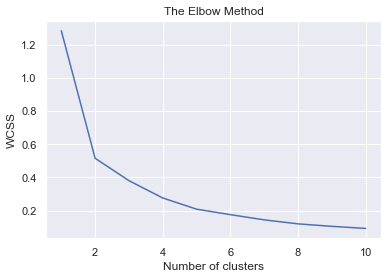

In [116]:
C = Safe_Areas.iloc[:, 0:2].values
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans_C = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_C.fit(A)
    wcss.append(kmeans_C.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

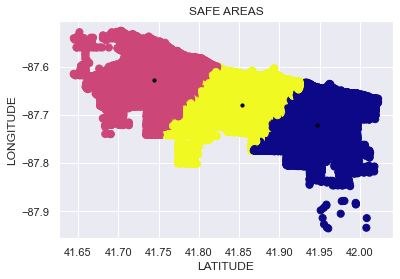

In [117]:
#Safe Area

kmeans_CC = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_C = kmeans_CC.fit_predict(C)
# 1.3 map data back to df
# Accident_Prone['CLUSTERS'] = y_kmeans +1 # to step up to group 1 to 3
plt.scatter(C[:, 0], C[:, 1], c=y_kmeans_C, s=50, cmap='plasma')

centers_C = kmeans_CC.cluster_centers_

Safe_Areas['CLUSTERS'] = y_kmeans_C +1

plt.title('SAFE AREAS')
plt.xlabel('LATITUDE')
plt.ylabel('LONGITUDE');
plt.scatter(centers_C[:, 0], centers_C[:, 1], color='BLACK', s=10, alpha=1);

In [118]:
Safe_Areas

,LATITUDE,LONGITUDE,LOCATION,ADDRESS,RISK_SCORE,CLUSTERS
0,41.751937,-87.559164,POINT (-87.559164441365 41.751936931709),2658 E 79TH ST,0.0,2
1,41.866555,-87.685890,POINT (-87.685889678053 41.866555356935),1201 S WESTERN AVE,0.0,3
2,41.774742,-87.612947,POINT (-87.612947221978 41.774741663786),6601 S MARQUETTE RD,0.0,2
3,41.774738,-87.613240,POINT (-87.613240463362 41.774738328394),6600 S MARQUETTE RD,0.0,2
4,41.774708,-87.739798,POINT (-87.739797521765 41.774708227681),4701 W 65TH ST,0.0,3
...,...,...,...,...,...,...
27801,41.751682,-87.704733,POINT (-87.704733070226 41.751682223611),7759 S SPAULDING AVE,1.0,2
27802,41.758649,-87.593374,POINT (-87.593374155881 41.758649291065),7500 S KIMBARK AVE,1.0,2
27803,41.751658,-87.605362,POINT (-87.605362007712 41.751657898722),7848 S COTTAGE GROVE AVE,1.0,2
27804,41.735786,-87.671647,POINT (-87.671646706386 41.735785509577),1932 W 87TH ST,1.0,2


Text(0, 0.5, 'WCSS')

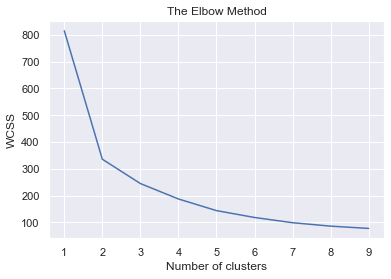

In [119]:
X = Accident_Prone.iloc[:, 0:2].values
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [120]:
Accident_Prone

,LATITUDE,LONGITUDE,LOCATION,ADDRESS,RISK_SCORE
0,41.751937,-87.559164,POINT (-87.559164441365 41.751936931709),2658 E 79TH ST,0.0
1,41.866555,-87.685890,POINT (-87.685889678053 41.866555356935),1201 S WESTERN AVE,0.0
2,41.774742,-87.612947,POINT (-87.612947221978 41.774741663786),6601 S MARQUETTE RD,0.0
3,41.774738,-87.613240,POINT (-87.613240463362 41.774738328394),6600 S MARQUETTE RD,0.0
4,41.774708,-87.739798,POINT (-87.739797521765 41.774708227681),4701 W 65TH ST,0.0
...,...,...,...,...,...
72676,41.880890,-87.721388,POINT (-87.721388487921 41.880889879848),3814 W MADISON ST,7.0
72677,41.803086,-87.743179,POINT (-87.743178861585 41.80308551281),4928 S CICERO AVE,8.0
72678,41.895408,-87.706405,POINT (-87.706404595702 41.895407901235),757 N KEDZIE AVE,8.0
72679,41.884476,-87.693273,POINT (-87.693272523474 41.884476074976),2650 W LAKE ST,8.0


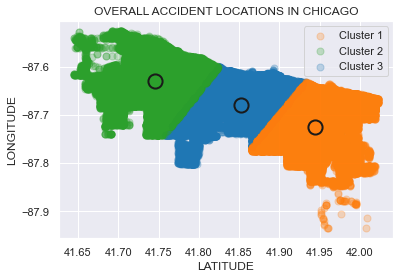

In [121]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from itertools import cycle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
n_clusters = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
#Clusters in DataFrame
Accident_Prone['CLUSTERS'] = y_kmeans +1 # to step up to group 1 to 3
labels = {1: "Cluster 1", 2: "Cluster 2", 0: "Cluster 3"}
colors = cycle(cm.tab10.colors)
plt.figure()
for i in range(n_clusters):
    # plot one cluster for each iteration
    color = next(colors)
    # find indeces corresponding to cluser i
    idx = y_kmeans == i
    # plot cluster
    plt.scatter(X[idx, 0], X[idx, 1], color=color, s=50, label=labels[i], alpha=0.25)
    # plot center
    plt.scatter(centers[i, 0], centers[i, 1], edgecolors="k", linewidth=2, color=color, s=200, alpha=1)
    
#Arranging the Legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.title('OVERALL ACCIDENT LOCATIONS IN CHICAGO')
plt.xlabel('LATITUDE')
plt.ylabel('LONGITUDE');

In [122]:
# Forming 9 Areas using the Risk score values and clusters

Area_1A = Accident_Prone[(Accident_Prone['CLUSTERS']==1) & (Accident_Prone['RISK_SCORE']>=5)]
Area_1B = Accident_Prone[(Accident_Prone['CLUSTERS']==1) & (Accident_Prone['RISK_SCORE']<5) & (Accident_Prone['RISK_SCORE']>=3)]
Area_1C = Accident_Prone[(Accident_Prone['CLUSTERS']==1) & (Accident_Prone['RISK_SCORE']<3)]

Area_2A = Accident_Prone[(Accident_Prone['CLUSTERS']==2) & (Accident_Prone['RISK_SCORE']>=5)]
Area_2B = Accident_Prone[(Accident_Prone['CLUSTERS']==2) & (Accident_Prone['RISK_SCORE']<5) & (Accident_Prone['RISK_SCORE']>=3)]
Area_2C = Accident_Prone[(Accident_Prone['CLUSTERS']==2) & (Accident_Prone['RISK_SCORE']<3)]

Area_3A = Accident_Prone[(Accident_Prone['CLUSTERS']==3) & (Accident_Prone['RISK_SCORE']>=5)]
Area_3B = Accident_Prone[(Accident_Prone['CLUSTERS']==3) & (Accident_Prone['RISK_SCORE']<5) & (Accident_Prone['RISK_SCORE']>=3)]
Area_3C = Accident_Prone[(Accident_Prone['CLUSTERS']==3) & (Accident_Prone['RISK_SCORE']<3)]

In [123]:
Area_2A

,LATITUDE,LONGITUDE,LOCATION,ADDRESS,RISK_SCORE,CLUSTERS
72555,41.916889,-87.740278,POINT (-87.740277928518 41.916888680909),4537 W ARMITAGE AVE,6.0,2
72557,42.008672,-87.690311,POINT (-87.690310838299 42.008671587187),7000 N WESTERN AVE,6.0,2
72558,41.990901,-87.673136,POINT (-87.673136023888 41.990900768001),1736 W PETERSON AVE,6.0,2
72571,41.880584,-87.747053,POINT (-87.747052941385 41.880583885354),4848 W MADISON ST,6.0,2
72573,41.892722,-87.726149,POINT (-87.726149344028 41.892722092718),632 N PULASKI RD,6.0,2
72581,41.909573,-87.741428,POINT (-87.74142821104 41.909573033239),4601 W NORTH AVE,6.0,2
72584,41.871325,-87.774192,POINT (-87.774192049944 41.8713251911),699 S AUSTIN BLVD,6.0,2
72594,41.923660,-87.801244,POINT (-87.801243587929 41.923660032932),7010 W GRAND AVE,6.0,2
72595,41.977066,-87.650297,POINT (-87.650297416 41.977065592454),5213 N LAKE SHORE DR NB,6.0,2
72598,42.013827,-87.704560,POINT (-87.704559952014 42.013826633311),7300 N SACRAMENTO AVE,6.0,2


In [124]:
# Starting Co-ordinates


start_lat = 41.88707
start_long = -87.6478


# Ending Co-ordinates

end_lat = 41.7766541 
end_long = -87.658113 


# start_latlng = (Longitude,Lattitude)
start_location = [start_long,start_lat]

# end_latlng  = (Longitude,Lattitude)
end_location = [end_long,end_lat]


coordinates = start_location,end_location
list(coordinates)

[[-87.6478, 41.88707], [-87.658113, 41.7766541]]

In [125]:
# Each Center of Clusters are used to find the distance between the start and end co-ordinated to the clusters
cluster_1_center = centers[0]
cluster_2_center = centers[1]
cluster_3_center = centers[2]

In [126]:
# define the start and end locations in latlng

from geopy.geocoders import Nominatim
from geopy.distance import distance as gd


start_latlng =(start_lat,start_long)
end_latlng = (end_lat,end_long)

start_len1 = gd(start_latlng, cluster_1_center).km
start_len2 = gd(start_latlng, cluster_2_center).km
start_len3 = gd(start_latlng, cluster_3_center).km

if (start_len1 <= start_len2) and (start_len1 <= start_len3):
    print("The Start point is closer to Cluster 1 and the distance is",start_len1,'KM')
elif (start_len2 <= start_len1) and (start_len2 <= start_len3):
    print("The Start point is closer to Cluster 2 and the distance is",start_len2,'KM')
else:
    print("The Start point is closer to Cluster 3 and the distance is",start_len3,'KM')


end_len1 = gd(end_latlng, cluster_1_center).km
end_len2 = gd(end_latlng, cluster_2_center).km
end_len3 = gd(end_latlng, cluster_3_center).km

if (end_len1 <= end_len2) and (end_len1 <= end_len3):
    print("The End point is closer to Cluster 1 and the distance is",end_len1,'KM')
elif (end_len2 <= end_len1) and (end_len2 <= end_len3):
    print("The End point is closer to Cluster 2 and the distance is",end_len2,'KM')
else:
    print("The End point is closer to Cluster 3 and the distance is",end_len3,'KM')


The Start point is closer to Cluster 1 and the distance is 4.649928796483273 KM
The End point is closer to Cluster 3 and the distance is 4.281230512403294 KM


In [127]:
#Identifying the risk cluster which is closer to start and end locations

if (start_len1 <= start_len2) and (start_len1 <= start_len3):
    Risky_Area_1 = Area_1A
elif (start_len2 <= start_len1) and (start_len2 <= start_len3):
    Risky_Area_1 = Area_2A
else:
    Risky_Area_1 = Area_3A
    
    
if (end_len1 <= end_len2) and (end_len1 <= end_len3):
    Risky_Area_2 = Area_1A
elif (end_len2 <= end_len1) and (end_len2 <= end_len3):
    Risky_Area_2 = Area_2A
else:
    Risky_Area_2 = Area_3A
    
    
if pd.DataFrame.equals(Risky_Area_1, Risky_Area_2):
    
    Risky_Areas = Risky_Area_1
else:
    Risky_Areas = Risky_Area_1.append(Risky_Area_2, ignore_index = True)
    
Risky_Areas

,LATITUDE,LONGITUDE,LOCATION,ADDRESS,RISK_SCORE,CLUSTERS
0,41.871766,-87.719561,POINT (-87.71956135568 41.87176574478),727 S INDEPENDENCE BLVD,5.0,1
1,41.866629,-87.695098,POINT (-87.695098090954 41.866629331397),2740 W ROOSEVELT RD,5.0,1
2,41.872511,-87.717937,POINT (-87.717936582806 41.872511350085),3659 W FLOURNOY ST,5.0,1
3,41.882330,-87.666983,POINT (-87.666982753227 41.882329582242),32 N ASHLAND AVE,6.0,1
4,41.882528,-87.701393,POINT (-87.701393161617 41.882527800937),50 N SACRAMENTO BLVD,6.0,1
...,...,...,...,...,...,...
100,41.686564,-87.662869,POINT (-87.662869160448 41.686563935329),11400 S MARSHFIELD AVE,7.0,3
101,41.766732,-87.673704,POINT (-87.673703972815 41.766731857123),2000 W 70TH ST,7.0,3
102,41.779603,-87.662939,POINT (-87.662939134453 41.779602725472),1530 W 63RD ST,7.0,3
103,41.772617,-87.624980,POINT (-87.62498023065 41.772616823648),3 E MARQUETTE RD,7.0,3
